<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/diabets0503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import itertools
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from xgboost import plot_importance



In [42]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [43]:
df2 = df

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.shape

(768, 9)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
print(df.dtypes.unique())

[dtype('int64') dtype('float64')]


In [13]:
100*(df.isnull().sum())/(df.shape[0])

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [14]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:

df['Outcome']=df['Outcome'].apply(lambda x: 'Diabetic' if x==1 else 'Nondiabetic')

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Nondiabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Nondiabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


NameError: ignored

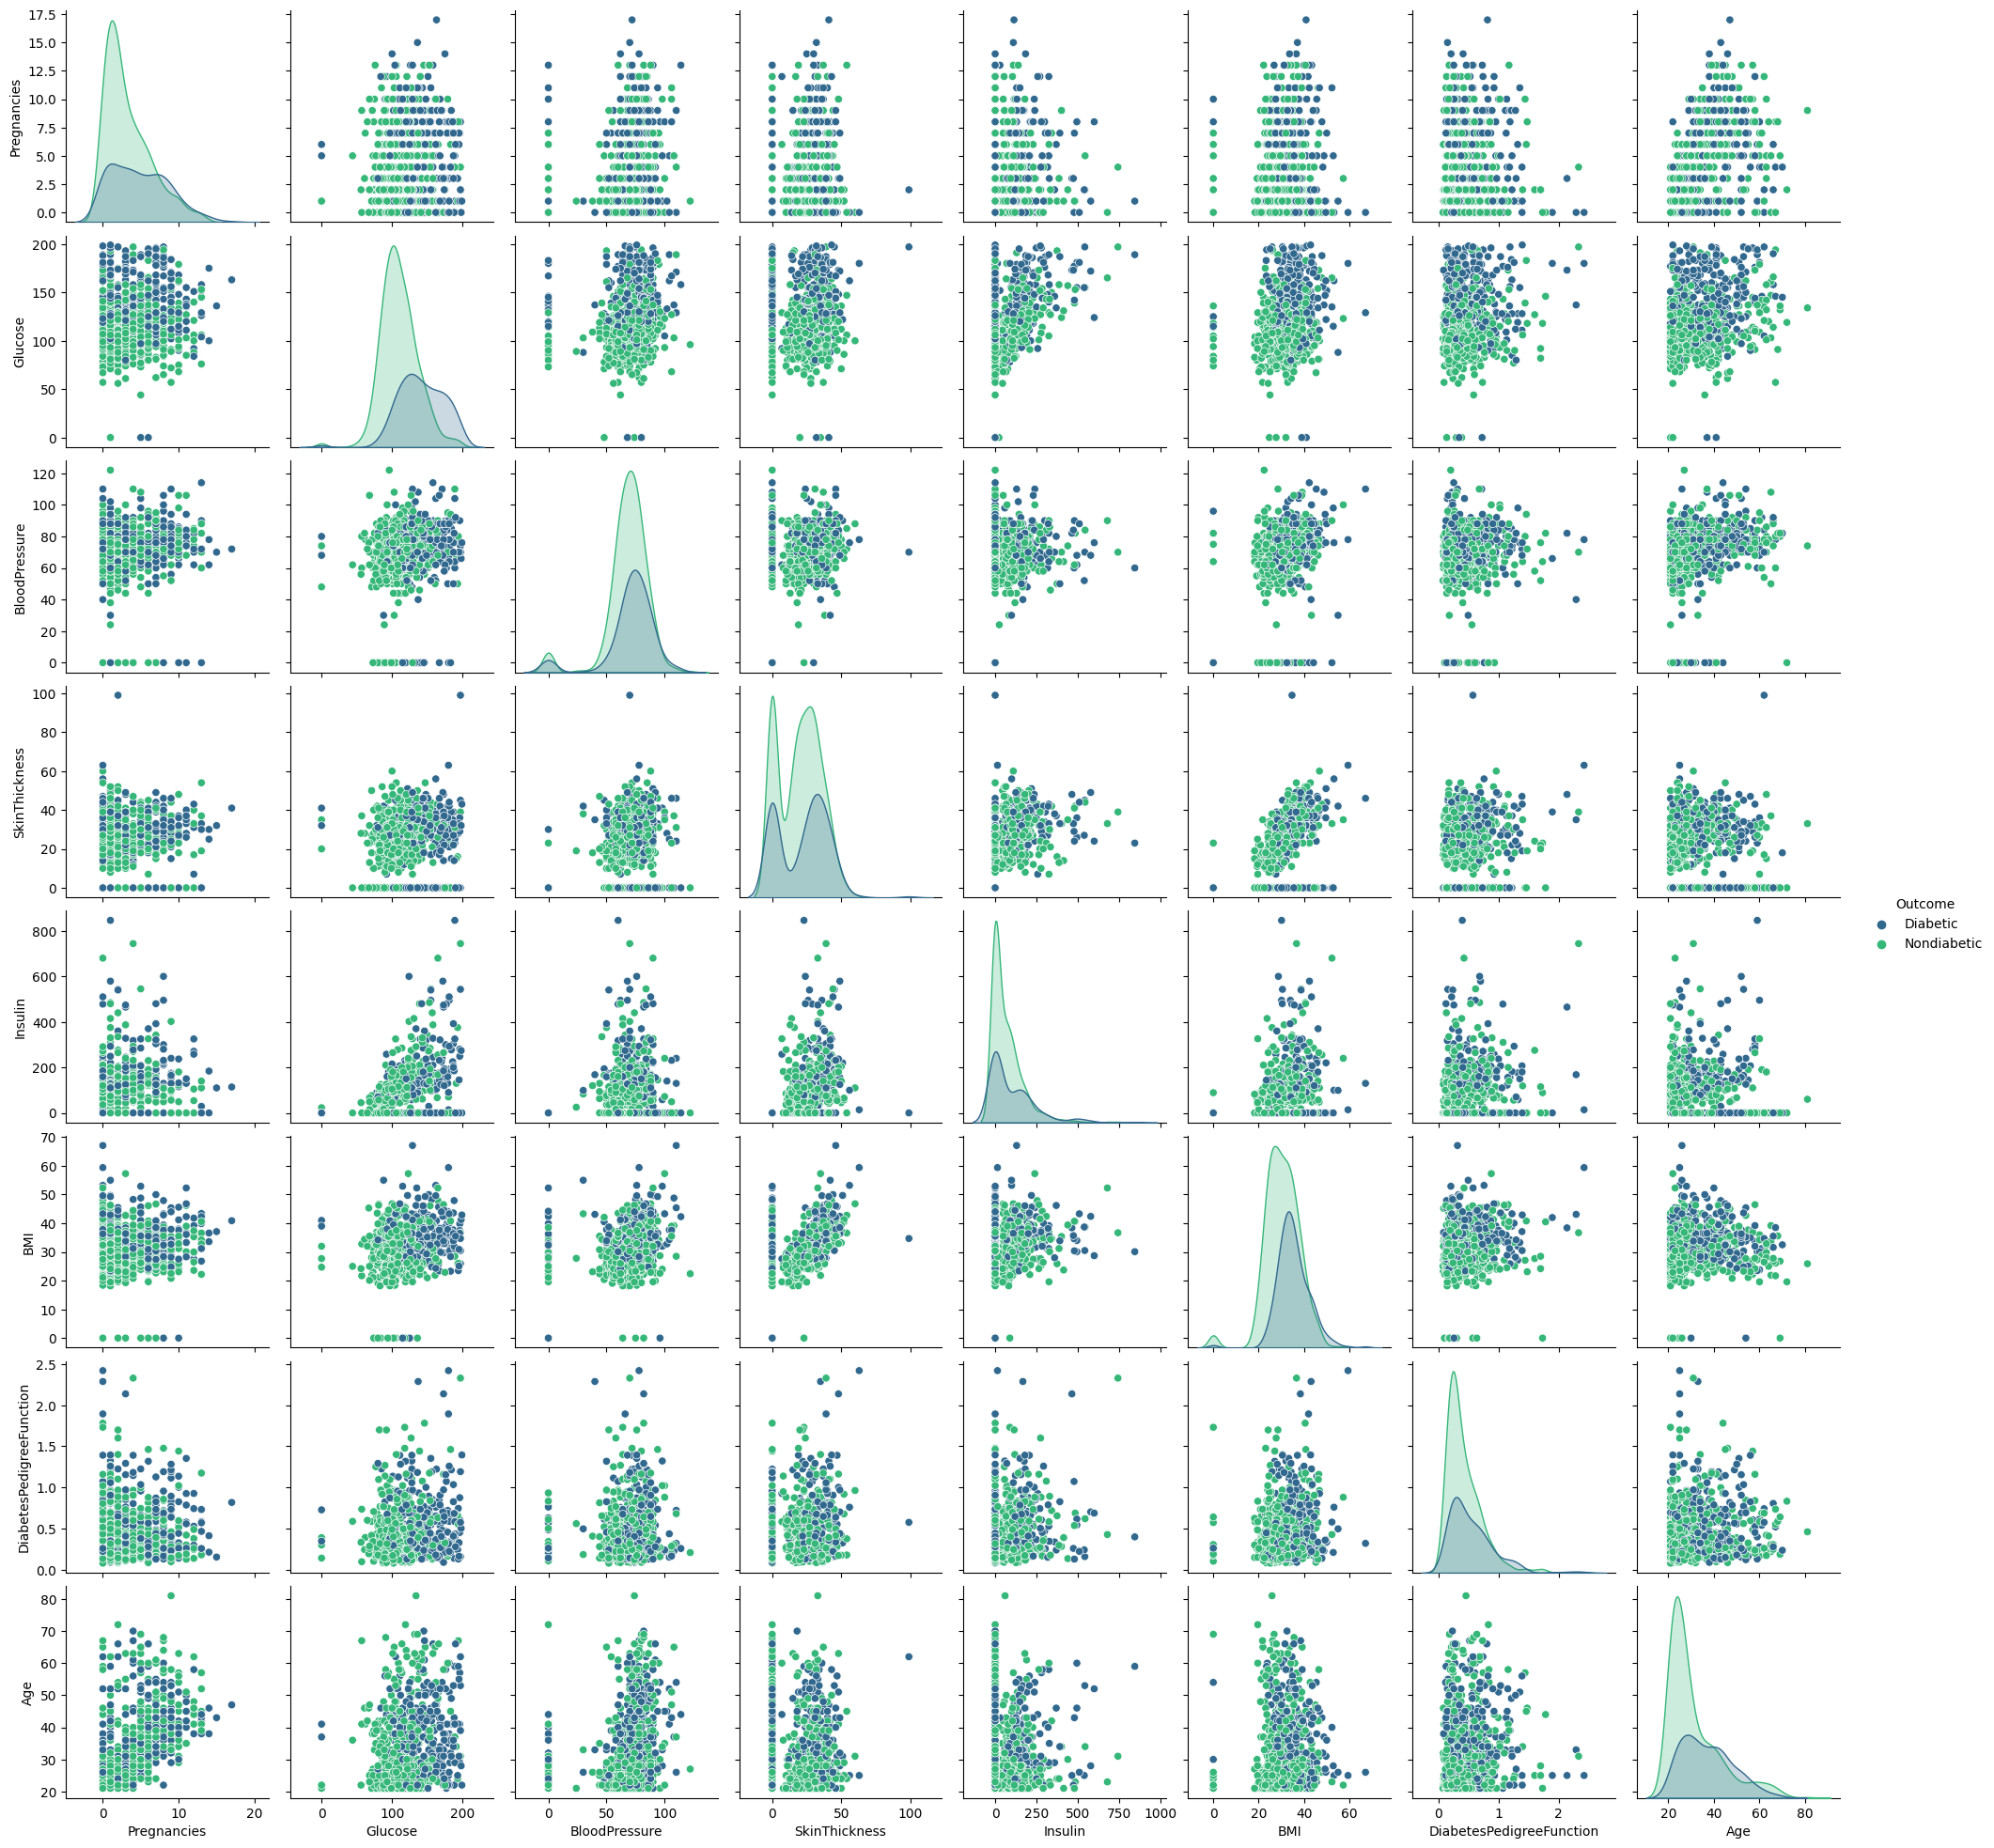

In [18]:
import seaborn as sns
sns.pairplot(df,hue='Outcome',palette='viridis')
plt.show()

<ipython-input-20-8a91aa8e77de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


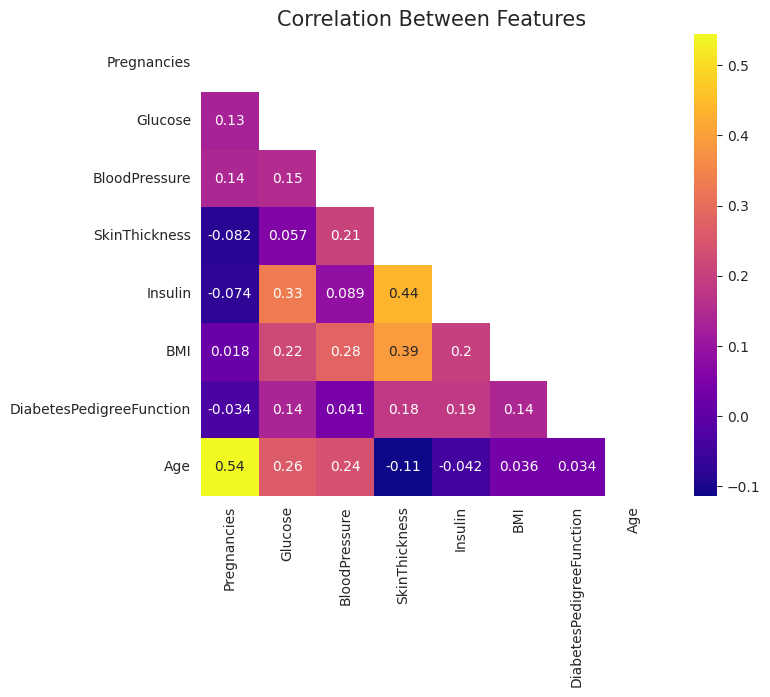

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True, cmap= 'plasma')
plt.title('Correlation Between Features', fontsize=15)
plt.show()

In [ ]:
# age, insulin, skinthickness,

In [23]:
ss = StandardScaler()

In [24]:
ss.fit(df.drop(['Outcome'], axis=1))

StandardScaler()

In [25]:
scaled=ss.transform(df.drop(['Outcome'], axis=1))

In [26]:
scaled_df=pd.DataFrame(data=scaled, columns=df.columns[:-1])

In [39]:
df2 = df

In [44]:
X=df2.drop(['Outcome'], axis=1)
y=df2['Outcome']

In [45]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [46]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
#split 2 
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify= y,
                                                    random_state=0)

train_X.reset_index(drop=True, inplace=True)
test_X.reset_index(drop=True, inplace=True)
train_Y.reset_index(drop=True, inplace=True)
test_Y.reset_index(drop=True, inplace=True)

In [70]:
train_X.shape

(614, 8)

In [71]:
test_X.shape

(154, 8)

In [72]:
train_y.shape

(614,)

In [74]:
test_y.shape

(154,)

In [48]:
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)

In [49]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
prediction_xgb=model_xgb.predict(X_test)

In [52]:
print(confusion_matrix(y_test,prediction_xgb))
print('\n')
print(classification_report(y_test,prediction_xgb))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_xgb), ndigits=2))

[[93 14]
 [14 33]]


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



Accuracy Score:  0.82


In [54]:
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.92148	validation_1-auc:0.83297
[1]	validation_0-auc:0.94421	validation_1-auc:0.82104
[2]	validation_0-auc:0.95657	validation_1-auc:0.83993
[3]	validation_0-auc:0.96063	validation_1-auc:0.84430
[4]	validation_0-auc:0.96438	validation_1-auc:0.84649
[5]	validation_0-auc:0.96819	validation_1-auc:0.85544
[6]	validation_0-auc:0.97017	validation_1-auc:0.85623
[7]	validation_0-auc:0.97341	validation_1-auc:0.85285
[8]	validation_0-auc:0.97796	validation_1-auc:0.84689
[9]	validation_0-auc:0.98191	validation_1-auc:0.84530
[10]	validation_0-auc:0.98637	validation_1-auc:0.84192
[11]	validation_0-auc:0.98757	validation_1-auc:0.84291
[12]	validation_0-auc:0.99127	validation_1-auc:0.83834
[13]	validation_0-auc:0.99204	validation_1-auc:0.84291
[14]	validation_0-auc:0.99255	validation_1-auc:0.83933
[15]	validation_0-auc:0.99460	validation_1-auc:0.84033
[16]	validation_0-auc:0.99518	validation_1-auc:0.84013
[17]	validation_0-auc:0.99551	validation_1-auc:0.84351
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:1.00000	validation_1-auc:0.82561
[37]	validation_0-auc:1.00000	validation_1-auc:0.82700
[38]	validation_0-auc:1.00000	validation_1-auc:0.82541
[39]	validation_0-auc:1.00000	validation_1-auc:0.82521
[40]	validation_0-auc:1.00000	validation_1-auc:0.82720
[41]	validation_0-auc:1.00000	validation_1-auc:0.82720
[42]	validation_0-auc:1.00000	validation_1-auc:0.82780
[43]	validation_0-auc:1.00000	validation_1-auc:0.82780
[44]	validation_0-auc:1.00000	validation_1-auc:0.82680
[45]	validation_0-auc:1.00000	validation_1-auc:0.82899
[46]	validation_0-auc:1.00000	validation_1-auc:0.82780
[47]	validation_0-auc:1.00000	validation_1-auc:0.82780
[48]	validation_0-auc:1.00000	validation_1-auc:0.82879
[49]	validation_0-auc:1.00000	validation_1-auc:0.82820
[50]	validation_0-auc:1.00000	validation_1-auc:0.82780
[51]	validation_0-auc:1.00000	validation_1-auc:0.82700
[52]	validation_0-auc:1.00000	validation_1-auc:0.82720
[53]	validation_0-auc:1.00000	validation_1-auc:0.82601
[54]	valid

In [55]:
from sklearn.model_selection import GridSearchCV
xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print(gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.81131	validation_1-auc:0.77769
[1]	validation_0-auc:0.85714	validation_1-auc:0.81955
[2]	validation_0-auc:0.87283	validation_1-auc:0.85564
[3]	validation_0-auc:0.87989	validation_1-auc:0.87314
[4]	validation_0-auc:0.89544	validation_1-auc:0.88755
[5]	validation_0-auc:0.90237	validation_1-auc:0.88546
[6]	validation_0-auc:0.91094	validation_1-auc:0.88169
[7]	validation_0-auc:0.91536	validation_1-auc:0.87910
[8]	validation_0-auc:0.92191	validation_1-auc:0.87135
[9]	validation_0-auc:0.92323	validation_1-auc:0.86160
[10]	validation_0-auc:0.92454	validation_1-auc:0.85942
[11]	validation_0-auc:0.92608	validation_1-auc:0.86419
[12]	validation_0-auc:0.92658	validation_1-auc:0.86021


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.92638	validation_1-auc:0.86001
[14]	validation_0-auc:0.92822	validation_1-auc:0.85842
[15]	validation_0-auc:0.93184	validation_1-auc:0.85305
[16]	validation_0-auc:0.93210	validation_1-auc:0.84967
[17]	validation_0-auc:0.93347	validation_1-auc:0.85146
[18]	validation_0-auc:0.93445	validation_1-auc:0.85345
[19]	validation_0-auc:0.93791	validation_1-auc:0.84848
[20]	validation_0-auc:0.93978	validation_1-auc:0.84967
[21]	validation_0-auc:0.94053	validation_1-auc:0.84888
[22]	validation_0-auc:0.94036	validation_1-auc:0.85126
[23]	validation_0-auc:0.93996	validation_1-auc:0.84987
[24]	validation_0-auc:0.93914	validation_1-auc:0.84848
[25]	validation_0-auc:0.94007	validation_1-auc:0.84629
[26]	validation_0-auc:0.94069	validation_1-auc:0.84589
[27]	validation_0-auc:0.94102	validation_1-auc:0.84589
[28]	validation_0-auc:0.94116	validation_1-auc:0.84450
[29]	validation_0-auc:0.94159	validation_1-auc:0.84510
[30]	validation_0-auc:0.94152	validation_1-auc:0.84709
[31]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.94233	validation_1-auc:0.88288
[13]	validation_0-auc:0.94658	validation_1-auc:0.87850
[14]	validation_0-auc:0.94617	validation_1-auc:0.87870
[15]	validation_0-auc:0.94571	validation_1-auc:0.87413
[16]	validation_0-auc:0.94480	validation_1-auc:0.87135
[17]	validation_0-auc:0.94873	validation_1-auc:0.87532
[18]	validation_0-auc:0.94878	validation_1-auc:0.87532
[19]	validation_0-auc:0.95080	validation_1-auc:0.87333
[20]	validation_0-auc:0.95055	validation_1-auc:0.87353
[21]	validation_0-auc:0.95088	validation_1-auc:0.87135
[22]	validation_0-auc:0.95076	validation_1-auc:0.87194
[23]	validation_0-auc:0.95163	validation_1-auc:0.86956
[24]	validation_0-auc:0.95285	validation_1-auc:0.87274
[25]	validation_0-auc:0.95401	validation_1-auc:0.87015
[26]	validation_0-auc:0.95378	validation_1-auc:0.86936
[27]	validation_0-auc:0.95429	validation_1-auc:0.87155
[28]	validation_0-auc:0.95415	validation_1-auc:0.87174
[29]	validation_0-auc:0.95391	validation_1-auc:0.86956
[30]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.92913	validation_1-auc:0.83695
[16]	validation_0-auc:0.93119	validation_1-auc:0.83317
[17]	validation_0-auc:0.93240	validation_1-auc:0.83277
[18]	validation_0-auc:0.93301	validation_1-auc:0.83138
[19]	validation_0-auc:0.93464	validation_1-auc:0.82979
[20]	validation_0-auc:0.93565	validation_1-auc:0.82979
[21]	validation_0-auc:0.93619	validation_1-auc:0.82760
[22]	validation_0-auc:0.93720	validation_1-auc:0.82780
[23]	validation_0-auc:0.93687	validation_1-auc:0.83058
[24]	validation_0-auc:0.93665	validation_1-auc:0.82700
[25]	validation_0-auc:0.93631	validation_1-auc:0.82501
[26]	validation_0-auc:0.93681	validation_1-auc:0.82780
[27]	validation_0-auc:0.93719	validation_1-auc:0.82661
[28]	validation_0-auc:0.93710	validation_1-auc:0.82601
[29]	validation_0-auc:0.93710	validation_1-auc:0.82462
[30]	validation_0-auc:0.93777	validation_1-auc:0.82362
[31]	validation_0-auc:0.93773	validation_1-auc:0.82462
[32]	validation_0-auc:0.93761	validation_1-auc:0.82501
[33]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80334	validation_1-auc:0.75860
[1]	validation_0-auc:0.84044	validation_1-auc:0.80066
[2]	validation_0-auc:0.85008	validation_1-auc:0.80811
[3]	validation_0-auc:0.86238	validation_1-auc:0.82382
[4]	validation_0-auc:0.87055	validation_1-auc:0.83645
[5]	validation_0-auc:0.87523	validation_1-auc:0.84400
[6]	validation_0-auc:0.88647	validation_1-auc:0.85564
[7]	validation_0-auc:0.89010	validation_1-auc:0.84987
[8]	validation_0-auc:0.89371	validation_1-auc:0.85902
[9]	validation_0-auc:0.89757	validation_1-auc:0.84788
[10]	validation_0-auc:0.90295	validation_1-auc:0.85106
[11]	validation_0-auc:0.90493	validation_1-auc:0.85186
[12]	validation_0-auc:0.90896	validation_1-auc:0.85444
[13]	validation_0-auc:0.91388	validation_1-auc:0.85106
[14]	validation_0-auc:0.91597	validation_1-auc:0.84848
[15]	validation_0-auc:0.91999	validation_1-auc:0.84709
[16]	validation_0-auc:0.92290	validation_1-auc:0.84629
[17]	validation_0-auc:0.92416	validation_1-auc:0.84371
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.94008	validation_1-auc:0.83893
[36]	validation_0-auc:0.94055	validation_1-auc:0.84013
[37]	validation_0-auc:0.94239	validation_1-auc:0.84052
[38]	validation_0-auc:0.94220	validation_1-auc:0.84331
[0]	validation_0-auc:0.81788	validation_1-auc:0.79131
[1]	validation_0-auc:0.86111	validation_1-auc:0.80354
[2]	validation_0-auc:0.86795	validation_1-auc:0.80692
[3]	validation_0-auc:0.87035	validation_1-auc:0.84082
[4]	validation_0-auc:0.87851	validation_1-auc:0.83366
[5]	validation_0-auc:0.87937	validation_1-auc:0.83824
[6]	validation_0-auc:0.89179	validation_1-auc:0.83605
[7]	validation_0-auc:0.89900	validation_1-auc:0.82601
[8]	validation_0-auc:0.90093	validation_1-auc:0.83595
[9]	validation_0-auc:0.90458	validation_1-auc:0.83058
[10]	validation_0-auc:0.90463	validation_1-auc:0.83535
[11]	validation_0-auc:0.90411	validation_1-auc:0.83774
[12]	validation_0-auc:0.90444	validation_1-auc:0.84231
[13]	validation_0-auc:0.90608	validation_1-auc:0.83516
[14]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-auc:0.92365	validation_1-auc:0.81050
[38]	validation_0-auc:0.92371	validation_1-auc:0.80911
[39]	validation_0-auc:0.92423	validation_1-auc:0.81030
[40]	validation_0-auc:0.92421	validation_1-auc:0.81408
[41]	validation_0-auc:0.92433	validation_1-auc:0.80931
[0]	validation_0-auc:0.82077	validation_1-auc:0.77272
[1]	validation_0-auc:0.87032	validation_1-auc:0.77103
[2]	validation_0-auc:0.87726	validation_1-auc:0.78544
[3]	validation_0-auc:0.89362	validation_1-auc:0.81666
[4]	validation_0-auc:0.91187	validation_1-auc:0.84231
[5]	validation_0-auc:0.91561	validation_1-auc:0.84669
[6]	validation_0-auc:0.92233	validation_1-auc:0.85146
[7]	validation_0-auc:0.93140	validation_1-auc:0.85743
[8]	validation_0-auc:0.93792	validation_1-auc:0.86856
[9]	validation_0-auc:0.93906	validation_1-auc:0.86816
[10]	validation_0-auc:0.93982	validation_1-auc:0.87035
[11]	validation_0-auc:0.93935	validation_1-auc:0.86677
[12]	validation_0-auc:0.94058	validation_1-auc:0.87015
[13]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.94334	validation_1-auc:0.86419
[34]	validation_0-auc:0.94348	validation_1-auc:0.86200
[35]	validation_0-auc:0.94362	validation_1-auc:0.86101
[36]	validation_0-auc:0.94344	validation_1-auc:0.86160
[37]	validation_0-auc:0.94371	validation_1-auc:0.86498
[38]	validation_0-auc:0.94409	validation_1-auc:0.86478
[39]	validation_0-auc:0.94395	validation_1-auc:0.86399
[40]	validation_0-auc:0.94440	validation_1-auc:0.86518
[41]	validation_0-auc:0.94457	validation_1-auc:0.86419
[42]	validation_0-auc:0.94376	validation_1-auc:0.86478
[43]	validation_0-auc:0.94434	validation_1-auc:0.86498
[44]	validation_0-auc:0.94498	validation_1-auc:0.86319
[45]	validation_0-auc:0.94475	validation_1-auc:0.85981
[46]	validation_0-auc:0.94572	validation_1-auc:0.85942
[47]	validation_0-auc:0.94567	validation_1-auc:0.85961
[48]	validation_0-auc:0.94592	validation_1-auc:0.85981
[49]	validation_0-auc:0.94639	validation_1-auc:0.86041
[50]	validation_0-auc:0.94685	validation_1-auc:0.86041
[51]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.95380	validation_1-auc:0.85683
[32]	validation_0-auc:0.95457	validation_1-auc:0.85802
[33]	validation_0-auc:0.95484	validation_1-auc:0.85862
[34]	validation_0-auc:0.95528	validation_1-auc:0.85723
[35]	validation_0-auc:0.95489	validation_1-auc:0.85663
[36]	validation_0-auc:0.95473	validation_1-auc:0.85763
[37]	validation_0-auc:0.95517	validation_1-auc:0.85961
[38]	validation_0-auc:0.95542	validation_1-auc:0.85862
[39]	validation_0-auc:0.95509	validation_1-auc:0.85743
[40]	validation_0-auc:0.95572	validation_1-auc:0.85305
[41]	validation_0-auc:0.95576	validation_1-auc:0.84808
[42]	validation_0-auc:0.95599	validation_1-auc:0.85226
[0]	validation_0-auc:0.84918	validation_1-auc:0.78495
[1]	validation_0-auc:0.89143	validation_1-auc:0.76576
[2]	validation_0-auc:0.90147	validation_1-auc:0.77928
[3]	validation_0-auc:0.90775	validation_1-auc:0.79578
[4]	validation_0-auc:0.91702	validation_1-auc:0.80811
[5]	validation_0-auc:0.91932	validation_1-auc:0.82581
[6]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.93725	validation_1-auc:0.81368
[32]	validation_0-auc:0.93723	validation_1-auc:0.81328
[33]	validation_0-auc:0.93834	validation_1-auc:0.81050
[34]	validation_0-auc:0.93792	validation_1-auc:0.81030
[35]	validation_0-auc:0.93770	validation_1-auc:0.81348
[36]	validation_0-auc:0.93761	validation_1-auc:0.81010
[37]	validation_0-auc:0.93664	validation_1-auc:0.81169
[38]	validation_0-auc:0.93728	validation_1-auc:0.80990
[39]	validation_0-auc:0.93821	validation_1-auc:0.81209
[40]	validation_0-auc:0.93771	validation_1-auc:0.81249
[41]	validation_0-auc:0.93854	validation_1-auc:0.81308
[42]	validation_0-auc:0.93838	validation_1-auc:0.81289
[0]	validation_0-auc:0.80598	validation_1-auc:0.81746
[1]	validation_0-auc:0.85769	validation_1-auc:0.81348
[2]	validation_0-auc:0.87538	validation_1-auc:0.82720
[3]	validation_0-auc:0.88007	validation_1-auc:0.83575
[4]	validation_0-auc:0.89019	validation_1-auc:0.84132
[5]	validation_0-auc:0.89620	validation_1-auc:0.84341
[6]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.93834	validation_1-auc:0.85723
[34]	validation_0-auc:0.93847	validation_1-auc:0.85544
[35]	validation_0-auc:0.93785	validation_1-auc:0.85703
[36]	validation_0-auc:0.93752	validation_1-auc:0.85763
[37]	validation_0-auc:0.93757	validation_1-auc:0.86061
[38]	validation_0-auc:0.93761	validation_1-auc:0.86041
[39]	validation_0-auc:0.93761	validation_1-auc:0.85782
[40]	validation_0-auc:0.93817	validation_1-auc:0.86061
[0]	validation_0-auc:0.81085	validation_1-auc:0.74418
[1]	validation_0-auc:0.85324	validation_1-auc:0.77162
[2]	validation_0-auc:0.86272	validation_1-auc:0.79718
[3]	validation_0-auc:0.87632	validation_1-auc:0.81955
[4]	validation_0-auc:0.88571	validation_1-auc:0.83466
[5]	validation_0-auc:0.89082	validation_1-auc:0.84271
[6]	validation_0-auc:0.90086	validation_1-auc:0.84470
[7]	validation_0-auc:0.90705	validation_1-auc:0.84430
[8]	validation_0-auc:0.91183	validation_1-auc:0.85484
[9]	validation_0-auc:0.91669	validation_1-auc:0.84669
[10]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.94448	validation_1-auc:0.84132
[30]	validation_0-auc:0.94427	validation_1-auc:0.84311
[31]	validation_0-auc:0.94437	validation_1-auc:0.84430
[32]	validation_0-auc:0.94365	validation_1-auc:0.84629
[33]	validation_0-auc:0.94464	validation_1-auc:0.84092
[34]	validation_0-auc:0.94445	validation_1-auc:0.84331
[35]	validation_0-auc:0.94498	validation_1-auc:0.84251
[36]	validation_0-auc:0.94467	validation_1-auc:0.84629
[37]	validation_0-auc:0.94541	validation_1-auc:0.84033
[38]	validation_0-auc:0.94616	validation_1-auc:0.83953
[39]	validation_0-auc:0.94600	validation_1-auc:0.83874
[0]	validation_0-auc:0.81666	validation_1-auc:0.79529
[1]	validation_0-auc:0.86730	validation_1-auc:0.80036
[2]	validation_0-auc:0.87439	validation_1-auc:0.81100
[3]	validation_0-auc:0.87532	validation_1-auc:0.83466
[4]	validation_0-auc:0.88596	validation_1-auc:0.82611
[5]	validation_0-auc:0.88879	validation_1-auc:0.83645
[6]	validation_0-auc:0.89936	validation_1-auc:0.82442
[7]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-auc:0.93001	validation_1-auc:0.83456
[37]	validation_0-auc:0.92980	validation_1-auc:0.83794
[38]	validation_0-auc:0.92947	validation_1-auc:0.83535
[39]	validation_0-auc:0.92977	validation_1-auc:0.83516
[40]	validation_0-auc:0.93040	validation_1-auc:0.83516
[41]	validation_0-auc:0.92999	validation_1-auc:0.83337
[42]	validation_0-auc:0.93046	validation_1-auc:0.83476
[43]	validation_0-auc:0.92986	validation_1-auc:0.83615
[44]	validation_0-auc:0.92965	validation_1-auc:0.83555
[0]	validation_0-auc:0.82074	validation_1-auc:0.76158
[1]	validation_0-auc:0.87168	validation_1-auc:0.81090
[2]	validation_0-auc:0.88965	validation_1-auc:0.81676
[3]	validation_0-auc:0.89494	validation_1-auc:0.84271
[4]	validation_0-auc:0.90688	validation_1-auc:0.84092
[5]	validation_0-auc:0.91338	validation_1-auc:0.83814
[6]	validation_0-auc:0.91737	validation_1-auc:0.84560
[7]	validation_0-auc:0.92412	validation_1-auc:0.84261
[8]	validation_0-auc:0.92647	validation_1-auc:0.84599
[9]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.94267	validation_1-auc:0.83734
[31]	validation_0-auc:0.94294	validation_1-auc:0.83675
[32]	validation_0-auc:0.94339	validation_1-auc:0.83774
[33]	validation_0-auc:0.94326	validation_1-auc:0.83575
[34]	validation_0-auc:0.94308	validation_1-auc:0.83615
[35]	validation_0-auc:0.94431	validation_1-auc:0.83516
[36]	validation_0-auc:0.94386	validation_1-auc:0.83456
[37]	validation_0-auc:0.94433	validation_1-auc:0.83834
[38]	validation_0-auc:0.94483	validation_1-auc:0.83953
[39]	validation_0-auc:0.94386	validation_1-auc:0.83496
[40]	validation_0-auc:0.94446	validation_1-auc:0.83496
[0]	validation_0-auc:0.82961	validation_1-auc:0.75701
[1]	validation_0-auc:0.88129	validation_1-auc:0.78435
[2]	validation_0-auc:0.88685	validation_1-auc:0.80692
[3]	validation_0-auc:0.89666	validation_1-auc:0.82213
[4]	validation_0-auc:0.91035	validation_1-auc:0.82541
[5]	validation_0-auc:0.91461	validation_1-auc:0.83337
[6]	validation_0-auc:0.91927	validation_1-auc:0.84460
[7]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.95696	validation_1-auc:0.84649
[35]	validation_0-auc:0.95678	validation_1-auc:0.84629
[36]	validation_0-auc:0.95672	validation_1-auc:0.84530
[37]	validation_0-auc:0.95696	validation_1-auc:0.84470
[38]	validation_0-auc:0.95690	validation_1-auc:0.84888
[39]	validation_0-auc:0.95731	validation_1-auc:0.84908
[40]	validation_0-auc:0.95700	validation_1-auc:0.84768
[41]	validation_0-auc:0.95712	validation_1-auc:0.84788
[42]	validation_0-auc:0.95625	validation_1-auc:0.84848
[43]	validation_0-auc:0.95605	validation_1-auc:0.84908
[44]	validation_0-auc:0.95667	validation_1-auc:0.84808
[45]	validation_0-auc:0.95658	validation_1-auc:0.84967
[46]	validation_0-auc:0.95686	validation_1-auc:0.84868
[47]	validation_0-auc:0.95673	validation_1-auc:0.84788
[48]	validation_0-auc:0.95703	validation_1-auc:0.85067
[49]	validation_0-auc:0.95669	validation_1-auc:0.84748
[50]	validation_0-auc:0.95644	validation_1-auc:0.84669
[51]	validation_0-auc:0.95643	validation_1-auc:0.84589
[52]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.93565	validation_1-auc:0.82243
[32]	validation_0-auc:0.93633	validation_1-auc:0.82203
[33]	validation_0-auc:0.93681	validation_1-auc:0.81965
[34]	validation_0-auc:0.93686	validation_1-auc:0.81825
[0]	validation_0-auc:0.82014	validation_1-auc:0.72808
[1]	validation_0-auc:0.86075	validation_1-auc:0.79250
[2]	validation_0-auc:0.88213	validation_1-auc:0.81428
[3]	validation_0-auc:0.88587	validation_1-auc:0.83943
[4]	validation_0-auc:0.89241	validation_1-auc:0.84729
[5]	validation_0-auc:0.89751	validation_1-auc:0.83158
[6]	validation_0-auc:0.89913	validation_1-auc:0.83396
[7]	validation_0-auc:0.90729	validation_1-auc:0.83138
[8]	validation_0-auc:0.90983	validation_1-auc:0.83854
[9]	validation_0-auc:0.91181	validation_1-auc:0.83237
[10]	validation_0-auc:0.91364	validation_1-auc:0.82939
[11]	validation_0-auc:0.91250	validation_1-auc:0.83297
[12]	validation_0-auc:0.91396	validation_1-auc:0.83297
[13]	validation_0-auc:0.91375	validation_1-auc:0.83695
[14]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81505	validation_1-auc:0.76814
[1]	validation_0-auc:0.86253	validation_1-auc:0.83565
[2]	validation_0-auc:0.87553	validation_1-auc:0.84589
[3]	validation_0-auc:0.87475	validation_1-auc:0.85116
[4]	validation_0-auc:0.88949	validation_1-auc:0.85822
[5]	validation_0-auc:0.90065	validation_1-auc:0.86250
[6]	validation_0-auc:0.90098	validation_1-auc:0.86896
[7]	validation_0-auc:0.90541	validation_1-auc:0.86638
[8]	validation_0-auc:0.91077	validation_1-auc:0.86439
[9]	validation_0-auc:0.91318	validation_1-auc:0.86021
[10]	validation_0-auc:0.91590	validation_1-auc:0.86359
[11]	validation_0-auc:0.91651	validation_1-auc:0.86936
[12]	validation_0-auc:0.91703	validation_1-auc:0.87135
[13]	validation_0-auc:0.91985	validation_1-auc:0.87075
[14]	validation_0-auc:0.92103	validation_1-auc:0.86816
[15]	validation_0-auc:0.92281	validation_1-auc:0.86757
[16]	validation_0-auc:0.92606	validation_1-auc:0.86558
[17]	validation_0-auc:0.92606	validation_1-auc:0.86240
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.93952	validation_1-auc:0.84788
[34]	validation_0-auc:0.93982	validation_1-auc:0.84987
[35]	validation_0-auc:0.94000	validation_1-auc:0.84888
[36]	validation_0-auc:0.94054	validation_1-auc:0.84868
[37]	validation_0-auc:0.94014	validation_1-auc:0.84589
[38]	validation_0-auc:0.94105	validation_1-auc:0.84311
[39]	validation_0-auc:0.94129	validation_1-auc:0.84092
[40]	validation_0-auc:0.94133	validation_1-auc:0.84331
[41]	validation_0-auc:0.94156	validation_1-auc:0.84550
[42]	validation_0-auc:0.94369	validation_1-auc:0.84410
[0]	validation_0-auc:0.83679	validation_1-auc:0.80175
[1]	validation_0-auc:0.87235	validation_1-auc:0.83227
[2]	validation_0-auc:0.88369	validation_1-auc:0.82352
[3]	validation_0-auc:0.88451	validation_1-auc:0.85504
[4]	validation_0-auc:0.89042	validation_1-auc:0.84430
[5]	validation_0-auc:0.89448	validation_1-auc:0.84609
[6]	validation_0-auc:0.89686	validation_1-auc:0.84162
[7]	validation_0-auc:0.89899	validation_1-auc:0.83784
[8]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84623	validation_1-auc:0.75164
[1]	validation_0-auc:0.89733	validation_1-auc:0.79340
[2]	validation_0-auc:0.91128	validation_1-auc:0.82074
[3]	validation_0-auc:0.92262	validation_1-auc:0.84381
[4]	validation_0-auc:0.93114	validation_1-auc:0.82233
[5]	validation_0-auc:0.93475	validation_1-auc:0.83207
[6]	validation_0-auc:0.93577	validation_1-auc:0.83436
[7]	validation_0-auc:0.93884	validation_1-auc:0.83357
[8]	validation_0-auc:0.93889	validation_1-auc:0.83376
[9]	validation_0-auc:0.94272	validation_1-auc:0.82859
[10]	validation_0-auc:0.94397	validation_1-auc:0.83337
[11]	validation_0-auc:0.94606	validation_1-auc:0.83197
[12]	validation_0-auc:0.94514	validation_1-auc:0.83655
[13]	validation_0-auc:0.94478	validation_1-auc:0.83635
[14]	validation_0-auc:0.94670	validation_1-auc:0.83595
[15]	validation_0-auc:0.94794	validation_1-auc:0.83575
[16]	validation_0-auc:0.94609	validation_1-auc:0.82641
[17]	validation_0-auc:0.94545	validation_1-auc:0.82541
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.94919	validation_1-auc:0.83973
[30]	validation_0-auc:0.94866	validation_1-auc:0.83933
[31]	validation_0-auc:0.94865	validation_1-auc:0.83874
[32]	validation_0-auc:0.94738	validation_1-auc:0.84371
[0]	validation_0-auc:0.84566	validation_1-auc:0.75671
[1]	validation_0-auc:0.90250	validation_1-auc:0.79787
[2]	validation_0-auc:0.91309	validation_1-auc:0.80990
[3]	validation_0-auc:0.91703	validation_1-auc:0.82541
[4]	validation_0-auc:0.93048	validation_1-auc:0.83714
[5]	validation_0-auc:0.94190	validation_1-auc:0.84430
[6]	validation_0-auc:0.94796	validation_1-auc:0.84550
[7]	validation_0-auc:0.95265	validation_1-auc:0.84748
[8]	validation_0-auc:0.95373	validation_1-auc:0.83893
[9]	validation_0-auc:0.95495	validation_1-auc:0.83376
[10]	validation_0-auc:0.95627	validation_1-auc:0.83555
[11]	validation_0-auc:0.95674	validation_1-auc:0.83953
[12]	validation_0-auc:0.95786	validation_1-auc:0.83933
[13]	validation_0-auc:0.95913	validation_1-auc:0.84470
[14]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.96380	validation_1-auc:0.84530
[30]	validation_0-auc:0.96411	validation_1-auc:0.84768
[31]	validation_0-auc:0.96357	validation_1-auc:0.84947
[32]	validation_0-auc:0.96440	validation_1-auc:0.84888
[33]	validation_0-auc:0.96403	validation_1-auc:0.85106
[34]	validation_0-auc:0.96526	validation_1-auc:0.84768
[35]	validation_0-auc:0.96560	validation_1-auc:0.84788
[36]	validation_0-auc:0.96574	validation_1-auc:0.84848
[37]	validation_0-auc:0.96615	validation_1-auc:0.84510
[38]	validation_0-auc:0.96648	validation_1-auc:0.84391
[39]	validation_0-auc:0.96675	validation_1-auc:0.84808
[40]	validation_0-auc:0.96711	validation_1-auc:0.85007
[41]	validation_0-auc:0.96716	validation_1-auc:0.84848
[42]	validation_0-auc:0.96755	validation_1-auc:0.84848
[43]	validation_0-auc:0.96781	validation_1-auc:0.84649
[44]	validation_0-auc:0.96807	validation_1-auc:0.84709
[45]	validation_0-auc:0.96808	validation_1-auc:0.84410
[46]	validation_0-auc:0.96727	validation_1-auc:0.84291
[47]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.93766	validation_1-auc:0.81110
[30]	validation_0-auc:0.93808	validation_1-auc:0.80871
[0]	validation_0-auc:0.82406	validation_1-auc:0.73026
[1]	validation_0-auc:0.87066	validation_1-auc:0.78246
[2]	validation_0-auc:0.89129	validation_1-auc:0.80056
[3]	validation_0-auc:0.90443	validation_1-auc:0.80354
[4]	validation_0-auc:0.90936	validation_1-auc:0.81030
[5]	validation_0-auc:0.91266	validation_1-auc:0.81766
[6]	validation_0-auc:0.91307	validation_1-auc:0.81199
[7]	validation_0-auc:0.91685	validation_1-auc:0.81458
[8]	validation_0-auc:0.92103	validation_1-auc:0.82163
[9]	validation_0-auc:0.92311	validation_1-auc:0.82084
[10]	validation_0-auc:0.92423	validation_1-auc:0.81786
[11]	validation_0-auc:0.92619	validation_1-auc:0.81766
[12]	validation_0-auc:0.92728	validation_1-auc:0.82661
[13]	validation_0-auc:0.92851	validation_1-auc:0.82800
[14]	validation_0-auc:0.92752	validation_1-auc:0.82999
[15]	validation_0-auc:0.92794	validation_1-auc:0.83416
[16]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.93748	validation_1-auc:0.83197
[30]	validation_0-auc:0.93809	validation_1-auc:0.83237
[31]	validation_0-auc:0.93703	validation_1-auc:0.82919
[32]	validation_0-auc:0.93733	validation_1-auc:0.82780
[33]	validation_0-auc:0.93769	validation_1-auc:0.82303
[34]	validation_0-auc:0.93857	validation_1-auc:0.82621
[35]	validation_0-auc:0.93853	validation_1-auc:0.82342
[36]	validation_0-auc:0.93777	validation_1-auc:0.82163
[37]	validation_0-auc:0.93780	validation_1-auc:0.82064
[38]	validation_0-auc:0.93811	validation_1-auc:0.82422
[39]	validation_0-auc:0.93848	validation_1-auc:0.82581
[40]	validation_0-auc:0.93842	validation_1-auc:0.82521
[41]	validation_0-auc:0.93912	validation_1-auc:0.82462
[42]	validation_0-auc:0.93929	validation_1-auc:0.82044
[43]	validation_0-auc:0.93982	validation_1-auc:0.82044
[44]	validation_0-auc:0.93976	validation_1-auc:0.82124
[45]	validation_0-auc:0.94061	validation_1-auc:0.81905
[46]	validation_0-auc:0.94089	validation_1-auc:0.81706
[47]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.94571	validation_1-auc:0.83675
[29]	validation_0-auc:0.94604	validation_1-auc:0.83814
[30]	validation_0-auc:0.94663	validation_1-auc:0.83714
[31]	validation_0-auc:0.94667	validation_1-auc:0.83535
[32]	validation_0-auc:0.94707	validation_1-auc:0.83118
[33]	validation_0-auc:0.94776	validation_1-auc:0.83655
[0]	validation_0-auc:0.83938	validation_1-auc:0.79270
[1]	validation_0-auc:0.87459	validation_1-auc:0.82283
[2]	validation_0-auc:0.88723	validation_1-auc:0.82879
[3]	validation_0-auc:0.89013	validation_1-auc:0.84649
[4]	validation_0-auc:0.89665	validation_1-auc:0.84281
[5]	validation_0-auc:0.89980	validation_1-auc:0.84391
[6]	validation_0-auc:0.90430	validation_1-auc:0.84331
[7]	validation_0-auc:0.91076	validation_1-auc:0.82899
[8]	validation_0-auc:0.91345	validation_1-auc:0.83138
[9]	validation_0-auc:0.91558	validation_1-auc:0.82879
[10]	validation_0-auc:0.91643	validation_1-auc:0.82283
[11]	validation_0-auc:0.91819	validation_1-auc:0.82442
[12]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.93241	validation_1-auc:0.80712
[32]	validation_0-auc:0.93225	validation_1-auc:0.80871
[0]	validation_0-auc:0.85976	validation_1-auc:0.81567
[1]	validation_0-auc:0.90877	validation_1-auc:0.83635
[2]	validation_0-auc:0.91278	validation_1-auc:0.84560
[3]	validation_0-auc:0.92310	validation_1-auc:0.84977
[4]	validation_0-auc:0.93334	validation_1-auc:0.83933
[5]	validation_0-auc:0.93586	validation_1-auc:0.83337
[6]	validation_0-auc:0.93867	validation_1-auc:0.83207
[7]	validation_0-auc:0.94448	validation_1-auc:0.82760
[8]	validation_0-auc:0.95059	validation_1-auc:0.83138
[9]	validation_0-auc:0.95383	validation_1-auc:0.82561
[10]	validation_0-auc:0.95401	validation_1-auc:0.82700
[11]	validation_0-auc:0.95601	validation_1-auc:0.83217
[12]	validation_0-auc:0.95843	validation_1-auc:0.83476
[13]	validation_0-auc:0.96029	validation_1-auc:0.83516
[14]	validation_0-auc:0.96190	validation_1-auc:0.83794
[15]	validation_0-auc:0.96312	validation_1-auc:0.83893
[16]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
0.8497713263074169


In [ ]:
{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
df0.8497713263074169

[0]	validation_0-auc:0.88312	validation_1-auc:0.83028
[1]	validation_0-auc:0.90342	validation_1-auc:0.83038
[2]	validation_0-auc:0.90923	validation_1-auc:0.82849
[3]	validation_0-auc:0.92572	validation_1-auc:0.82770
[4]	validation_0-auc:0.93020	validation_1-auc:0.82899
[5]	validation_0-auc:0.94054	validation_1-auc:0.82352
[6]	validation_0-auc:0.94442	validation_1-auc:0.82293
[7]	validation_0-auc:0.94795	validation_1-auc:0.82144
[8]	validation_0-auc:0.95502	validation_1-auc:0.82362
[9]	validation_0-auc:0.95462	validation_1-auc:0.83138
[10]	validation_0-auc:0.95780	validation_1-auc:0.83436
[11]	validation_0-auc:0.96171	validation_1-auc:0.83794
[12]	validation_0-auc:0.96585	validation_1-auc:0.83893
[13]	validation_0-auc:0.96659	validation_1-auc:0.83913
[14]	validation_0-auc:0.96742	validation_1-auc:0.83953
[15]	validation_0-auc:0.96940	validation_1-auc:0.83516
[16]	validation_0-auc:0.97024	validation_1-auc:0.83476
[17]	validation_0-auc:0.97119	validation_1-auc:0.83456
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.98976	validation_1-auc:0.82004
[35]	validation_0-auc:0.99054	validation_1-auc:0.82163
[36]	validation_0-auc:0.99185	validation_1-auc:0.81945
[37]	validation_0-auc:0.99269	validation_1-auc:0.82183
[38]	validation_0-auc:0.99322	validation_1-auc:0.82044
[39]	validation_0-auc:0.99351	validation_1-auc:0.82064
[40]	validation_0-auc:0.99422	validation_1-auc:0.81825
[41]	validation_0-auc:0.99467	validation_1-auc:0.81726
[42]	validation_0-auc:0.99498	validation_1-auc:0.81786
[43]	validation_0-auc:0.99514	validation_1-auc:0.81627
[44]	validation_0-auc:0.99561	validation_1-auc:0.81567
[45]	validation_0-auc:0.99591	validation_1-auc:0.81587
[46]	validation_0-auc:0.99624	validation_1-auc:0.81448
[47]	validation_0-auc:0.99659	validation_1-auc:0.81467
[48]	validation_0-auc:0.99699	validation_1-auc:0.81348
[49]	validation_0-auc:0.99690	validation_1-auc:0.81368
[50]	validation_0-auc:0.99736	validation_1-auc:0.81507
[51]	validation_0-auc:0.99777	validation_1-auc:0.81507
[52]	valid

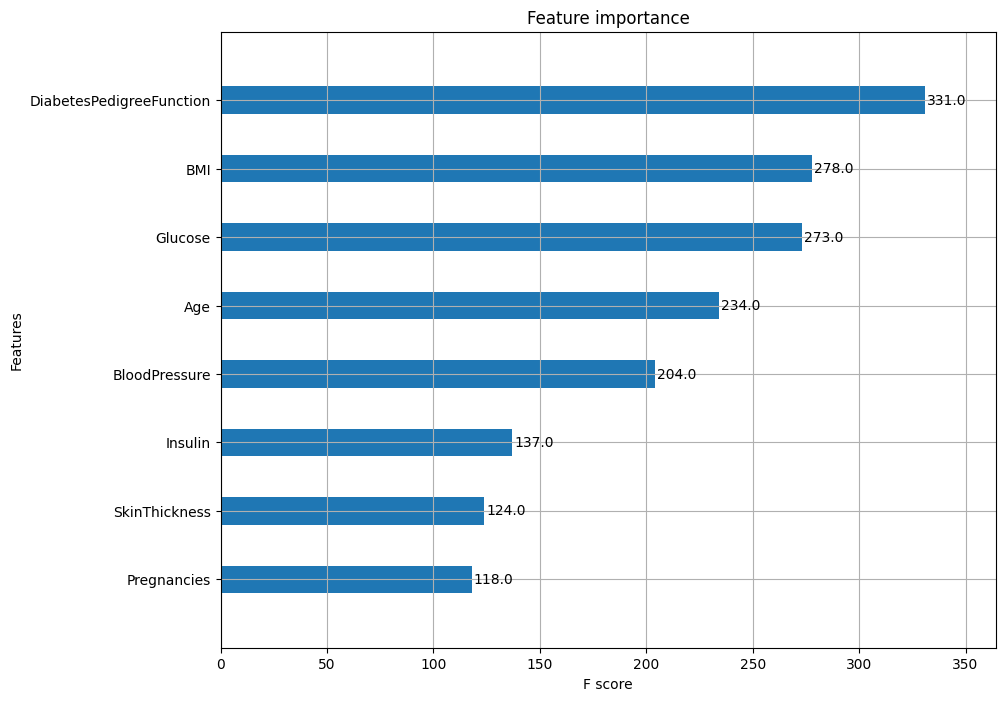

In [56]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, colsample_bytree=0.75, max_depth=5, min_child_weight=3)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(xgb_roc_score)

from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)
plt.show()

In [ ]:
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)

In [57]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fpr, tpr, th = roc_curve(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("AUROC: ", roc_auc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

plt.figure(figsize=[9,7])
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label='AUC (area = %0.4f)' %roc_auc)
plt.plot([0,1],[0,1], color='black', lw=1, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity', fontsize=25) # [FPR]
plt.ylabel('Sensitivity', fontsize=25) # [TPR]
plt.title('ROC curve', fontsize=25)
plt.legend(loc='lower right', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

NameError: ignored

In [75]:
# logistic regression with l1 penalty - embedded method
lr1 = LogisticRegression(random_state=0, penalty="l1",
            class_weight="balanced", solver="saga", max_iter=5000)
lr1.fit(train_X, train_y.values.ravel())

lr1.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[ 0.10356604,  0.01290954, -0.02773807, -0.00032161,  0.0011031 ,
         0.00576479,  0.06189308,  0.00044928]])

In [76]:
# logistic regression with l2 penalty - embedded method
lr2 = LogisticRegression(random_state=0, penalty="l2",
            class_weight="balanced", solver="saga", max_iter=5000)
lr2.fit(train_X, train_y.values.ravel())

lr2.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[ 0.1043052 ,  0.01288467, -0.02781628, -0.00041211,  0.0011053 ,
         0.00588701,  0.07330069,  0.00039268]])

In [78]:
clf = MLPClassifier(solver="adam", max_iter=5000, activation = "relu",
                    hidden_layer_sizes = (12),                      
                    alpha = 0.01,
                    batch_size = 64,
                    learning_rate_init = 0.001,
                    random_state=2)

clf.fit(train_X, train_y.values.ravel())

MLPClassifier(alpha=0.01, batch_size=64, hidden_layer_sizes=12, max_iter=5000,
              random_state=2)

In [79]:
print(classification_report(test_y, clf.predict(test_X),
                            digits = 4,
                            target_names=["Not Diabetes",
                                          "Diabetes"]))

              precision    recall  f1-score   support

Not Diabetes     0.7768    0.8700    0.8208       100
    Diabetes     0.6905    0.5370    0.6042        54

    accuracy                         0.7532       154
   macro avg     0.7336    0.7035    0.7125       154
weighted avg     0.7465    0.7532    0.7448       154

